In [384]:
#Create a dataframe with stability score change for each UUD's SSMs. 
#Add bottleneck distances, retrieved from the appropriate json file, to each row of this dataframe


import pandas as pd
import numpy as np
import json

uud_rd1 = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/rd1_unexpectedly_unstable_designs.csv', comment='#')
col_list = ["name","sequence"]
uud_HR_names = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/rd1_unexpectedly_unstable_designs.csv', comment='#',usecols=col_list)

meta_data = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a.metadata.csv', comment='#')
col_list = ["human_readable_name","sequence","manipulation"]
All_HR_Names =  pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a.metadata.csv', comment='#',usecols=col_list)

ssm_rd1a = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a.v0.experimental_stability_scores.csv', comment='#')
col_list = ["stabilityscore_v2","sequence"]
ssm_stability_scores = rd1expss = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a.v0.experimental_stabilityPscores.csv', comment='#',usecols=col_list)

ssm_rd1a_rep2 = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a.v0.experimental_stability_scores.csv', comment='#')
col_list = ["stabilityscore_v2","sequence"]
ssm_stability_scores_rep2 = rd1expss = pd.read_csv('/data/sd2/protein-design/ssm_stabilities/unexpectedly_unstable_ssms_rd1a_rep2.v0.experimental_stabilityPscores.csv', comment='#',usecols=col_list)

#print(uud_rd1)
#print(uud_HR_names)

#print(meta_data)
#print(All_HR_Names)

#print(ssm_rd1a)
#print(ssm_stability_scores)


#for col in ssm_rd1a.columns: 
#    print(col) 
df1=pd.DataFrame(All_HR_Names) 
df2=pd.DataFrame(ssm_stability_scores)
df0=pd.DataFrame(ssm_stability_scores_rep2)
df0.columns = ['stabilityscore_v2_rep2', 'sequence']

df3=df1.merge(df2)
df3=df3.merge(df0,how='inner')
df3=df3.drop(columns=["sequence"])

df3['stability_score']=df3[['stabilityscore_v2','stabilityscore_v2_rep2']].min(axis=1)


file_dir='/data/sd2/protein-design/rocklin_pers_json'

df4=pd.DataFrame()
All_dif=[] 
for i in range(len(uud_HR_names)):
    
    name=uud_HR_names["name"][i]
    bool_mask=df3["human_readable_name"].str.startswith(name, na = False) 
    df4=df4.append(df3[bool_mask])
    bool_mask2=df4["human_readable_name"] == name
    base_stab_score=df4[bool_mask2]["stability_score"]
    base_stab_score=base_stab_score.values[0]
    difference=df3[bool_mask]["stability_score"] - base_stab_score
    All_dif=np.concatenate((All_dif,difference))
    


df4["stability_score_differences"]=All_dif
df4=df4.reset_index()
df4=df4.drop(columns=(["index","stabilityscore_v2","stabilityscore_v2_rep2"]))
df4["position"]=df4["manipulation"].str[1:-1].fillna(0)
for i in range(len(df4)):
    df4["position"][i]=int(df4["position"][i])
    
    
All_BD2=[]
All_BD1=[]
All_BD0=[]
for i in range(len(uud_HR_names)):    

    name=uud_HR_names["name"][i]
    bool_mask=df4["human_readable_name"].str.startswith(name, na = False) 
    file_name=file_dir+"/"+name+'_del_pers.json'
    with open(file_name) as f:
        pdata=json.load(f)
        df5=df4[bool_mask]["position"]
        df5=df5.reset_index()
    for j in range(len(df5)):
        pos=df5["position"][j]
        pos=str(pos)
        BD2=[pdata[pos]['BD2']]
        BD1=[pdata[pos]['BD1']]
        BD0=[pdata[pos]['BD0']]
        All_BD2=np.concatenate((All_BD2,BD2))
        All_BD1=np.concatenate((All_BD1,BD1))
        All_BD0=np.concatenate((All_BD0,BD0))
        
df4["BD2"]=All_BD2
df4["BD1"]=All_BD1
df4["BD0"]=All_BD0
    
df=df4

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [380]:
df3[['stabilityscore_v2','stabilityscore_v2_rep2']].min(axis=1)




0        0.083226
1        0.139819
2        0.157052
3       -1.233046
4       -0.529749
           ...   
14836   -0.144822
14837   -0.090831
14838   -0.110166
14839   -0.194768
14840   -0.345682
Length: 14841, dtype: float64

In [385]:
df4

,human_readable_name,manipulation,stability_score,stability_score_differences,position,BD2,BD1,BD0
0,HHH_rd4_0821,NaN,-0.285022,0.000000,0,0.000000,0.000000,0.000000
1,HHH_rd4_0821_P1A,P1A,-0.280822,0.004200,1,0.362518,0.329977,0.127323
2,HHH_rd4_0821_P1M,P1M,-0.328481,-0.043459,1,0.362518,0.329977,0.127323
3,HHH_rd4_0821_K6N,K6N,-0.283490,0.001532,6,0.082825,0.136666,0.233170
4,HHH_rd4_0821_K6P,K6P,-0.402124,-0.117102,6,0.082825,0.136666,0.233170
...,...,...,...,...,...,...,...,...
14500,EEHEE_rd4_0464_E43S,E43S,-0.436300,-0.199372,43,0.294112,0.298802,0.125241
14501,EEHEE_rd4_0464_E43T,E43T,-0.453981,-0.217053,43,0.294112,0.298802,0.125241
14502,EEHEE_rd4_0464_E43V,E43V,-0.401222,-0.164294,43,0.294112,0.298802,0.125241
14503,EEHEE_rd4_0464_E43W,E43W,-0.335335,-0.098408,43,0.294112,0.298802,0.125241


import matplotlib.pyplot as plt

y2big_ss=df[df["stability_score_differences"]>1]["BD2"]
y2lil_ss=df[df["stability_score_differences"]<1]["BD2"]

plt.hist([y2lil_ss,y2big_ss],density=True)


plt.show()

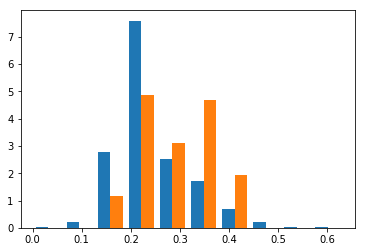

In [389]:
import matplotlib.pyplot as plt

y0big_ss=df[df["stability_score_differences"]>1]["BD0"] 
y0lil_ss=df[df["stability_score_differences"]<1]["BD0"]

plt.hist([y0lil_ss,y0big_ss],density=True)

plt.show()

In [306]:
x=df["stability_score_differences"].values
y0=df["BD0"].values
y1=df["BD1"].values
y2=df["BD2"].values


array([ 0.        , -0.47922583, -0.52688518, ..., -0.16429425,
       -0.09840768, -0.01435758])

In [300]:
df4

,human_readable_name,manipulation,stability_score_differences,position,BD2,BD1,BD0
0,HHH_rd4_0821,NaN,0.000000,0,0.000000,0.000000,0.000000
1,HHH_rd4_0821_P1A,P1A,-0.479226,1,0.362518,0.329977,0.127323
2,HHH_rd4_0821_P1M,P1M,-0.526885,1,0.362518,0.329977,0.127323
3,HHH_rd4_0821_K6N,K6N,0.028411,6,0.082825,0.136666,0.233170
4,HHH_rd4_0821_K6P,K6P,-0.600529,6,0.082825,0.136666,0.233170
...,...,...,...,...,...,...,...
14503,EEHEE_rd4_0464_E43S,E43S,-0.132044,43,0.294112,0.298802,0.125241
14504,EEHEE_rd4_0464_E43T,E43T,-0.179383,43,0.294112,0.298802,0.125241
14505,EEHEE_rd4_0464_E43V,E43V,-0.164294,43,0.294112,0.298802,0.125241
14506,EEHEE_rd4_0464_E43W,E43W,-0.098408,43,0.294112,0.298802,0.125241


In [320]:
df[df.stability_score_differences>1]["BD2"]

70       1.444969
111      1.444969
121      1.444969
147      0.083867
152      0.181210
           ...   
14336    0.221313
14398    0.106643
14415    0.256900
14429    0.294112
14446    2.872522
Name: BD2, Length: 401, dtype: float64

In [249]:
name

'HHH_rd4_0216'

In [252]:
uud_HR_names["name"][1]

'HHH_rd4_0216'

In [352]:
df0

,stabilityscore_v2,sequence
0,0.083226,DERVERIDERLIREGVSDEEIKKYLKRQGVDEEQVERVIRKVRLES...
1,0.139819,RRVKAVATLVEKGQPARVNNRGEKAQLQPESPQFEEAAQELTKGSS...
2,0.159246,TTDKFNGQTTTAPTTDEAQKIAEKYAKKYNLTVEVHGNKVTVKGSS...
3,-1.233046,KLTKVVDRVTDVREEEKQVHLQGEKVNKPDRIERVLEDITETLLES...
4,0.499455,GTDHVNGVQYNVDNPEEAQKIAEKAAKKAGLQTHVKNGEFQVHGSS...
...,...,...
14837,-0.103329,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRPDGSSGSS...
14838,-0.090831,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRQDGSSGSS...
14839,-0.110166,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRRDGSSGSS...
14840,-0.155448,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRSDGSSGSS...


In [356]:
df1

,sequence,human_readable_name,manipulation
0,DERVERIDERLIREGVSDEEIKKYLKRQGVDEEQVERVIRKVRLES...,HHH_rd4_0084,NaN
1,RRVKAVATLVEKGQPARVNNRGEKAQLQPESPQFEEAAQELTKGSS...,NaN,NaN
2,TTDKFNGQTTTAPTTDEAQKIAEKYAKKYNLTVEVHGNKVTVKGSS...,EEHEE_rd3_1148,NaN
3,KLTKVVDRVTDVREEEKQVHLQGEKVNKPDRIERVLEDITETLLES...,NaN,NaN
4,GTDHVNGVQYNVDNPEEAQKIAEKAAKKAGLQTHVKNGEFQVHGSS...,EEHEE_rd3_1705,NaN
...,...,...,...
14839,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRPDGSSGSS...,EHEE_rd4_0152_I39P,I39P
14840,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRQDGSSGSS...,EHEE_rd4_0152_I39Q,I39Q
14841,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRRDGSSGSS...,EHEE_rd4_0152_I39R,I39R
14842,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRSDGSSGSS...,EHEE_rd4_0152_I39S,I39S


In [355]:
df2

,stabilityscore_v2,sequence
0,0.593623,DERVERIDERLIREGVSDEEIKKYLKRQGVDEEQVERVIRKVRLES...
1,0.148961,RRVKAVATLVEKGQPARVNNRGEKAQLQPESPQFEEAAQELTKGSS...
2,0.157052,TTDKFNGQTTTAPTTDEAQKIAEKYAKKYNLTVEVHGNKVTVKGSS...
3,-1.159013,KLTKVVDRVTDVREEEKQVHLQGEKVNKPDRIERVLEDITETLLES...
4,-0.529749,GTDHVNGVQYNVDNPEEAQKIAEKAAKKAGLQTHVKNGEFQVHGSS...
...,...,...
14839,-0.144822,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRPDGSSGSS...
14840,-0.074529,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRQDGSSGSS...
14841,-0.098285,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRRDGSSGSS...
14842,-0.194768,QEQIHVHGEEKVKEAIKKAKKRNLEVHVEVENNRFIIRSDGSSGSS...
